In [1]:
# Can be applied to any of the world bank datasets 
# Applying to all by first merging

In [2]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os
from functools import reduce
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Pull all raw WorldBankData across all indicators 

folder_path = "WorldBankDatasets/"

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)
        
# Initialize the merged DataFrame with the first DataFrame
merged_df = dataframes[0]

# Merge the remaining DataFrames iteratively
for df in dataframes[1:]:
    merged_df = merged_df.merge(df, on=['Country', 'Year'], how = 'outer')
    
    
# Drop columns that end with "_y" - artifact of the merge 
columns_to_drop = [col for col in merged_df.columns if col.endswith("_y")]
merged_df = merged_df.drop(columns=columns_to_drop)

# Remove the _x suffix from column names to clean things up
merged_df.columns = [col.rstrip('_x') for col in merged_df.columns]

# Keep only the first occurrence of each column name
unique_columns = ~merged_df.columns.duplicated(keep='first')
merged_df = merged_df.loc[:, unique_columns]

merged_df

/Users/Jenny/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'SE.ADT.1524.LT.FM.ZS_x', 'SE.ENR.PRIM.FM.ZS_x', 'SL.UEM.TOTL.MA.ZS_x', 'SP.DYN.LE00.FE.IN_x', 'SE.ENR.TERT.FM.ZS_x', 'SE.ENR.PRSC.FM.ZS_x', 'SE.ENR.SECO.FM.ZS_x', 'SH.HIV.1524.MA.ZS_x', 'SH.HIV.1524.FE.ZS_x', 'SP.ADO.TFRT_x', 'SL.UEM.TOTL.FE.ZS_x', 'SP.DYN.LE00.MA.IN_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


,Country,Year,SG.VAW.1549.ZS,SG.VAW.ARGU.ZS,SG.VAW.BURN.ZS,SG.VAW.GOES.ZS,SG.VAW.NEGL.ZS,SG.VAW.REAS.ZS,SG.VAW.REFU.ZS,SH.ACS.ALON.Q1.ZS,...,SI.POV.MDIM.IT,SI.POV.MDIM.MA,SI.POV.MDIM.XQ,SI.POV.NAHC,SI.POV.UMIC,SI.POV.UMIC.GP,SI.SPR.PC40,SI.SPR.PC40.ZG,SI.SPR.PCAP,SI.SPR.PCAP.ZG
0,AUS,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AUS,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,USA,2080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3314,USA,2085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3315,USA,2090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3316,USA,2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/Jenny/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/Jenny/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/Jenny/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


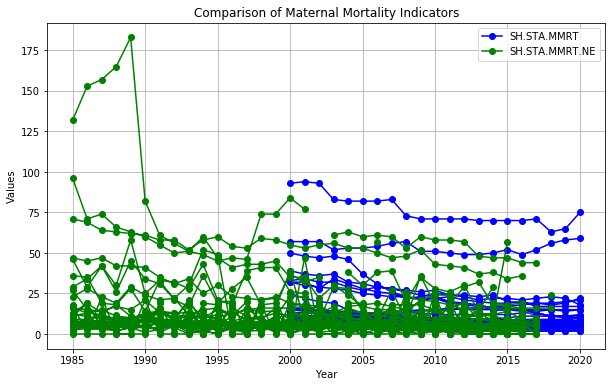

In [4]:
# Extract the 'Year' and Maternal Mortality Rate columns for comparison
years = merged_df['Year']
column1 = merged_df['SH.STA.MMRT']
column2 = merged_df['SH.STA.MMRT.NE']


# Create a line plot for each column
plt.figure(figsize=(10, 6))
plt.plot(years, column1, label='SH.STA.MMRT', marker='o', linestyle='-', color='b')
plt.plot(years, column2, label='SH.STA.MMRT.NE', marker='o', linestyle='-', color='g')


# Add labels
plt.title('Comparison of Maternal Mortality Indicators')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#### The same indicator across World Bank topics are consistent but the 2 maternal mortality rate indicators vary largely  

Code	SH.STA.MMRT.NE
Indicator Name	Maternal mortality ratio (national estimate, per 100,000 live births)   

Code	SH.STA.MMRT
Indicator Name	Maternal mortality ratio (modeled estimate, per 100,000 live births)

In [5]:
# first all rows without a value for maternal health should be dropped. 
# merged_df = merged_df.dropna(subset=['SH.STA.MMRT'])
# merged_df


#### Moving this into the modeling notebooks as both maternal mortality predictors should be explored 

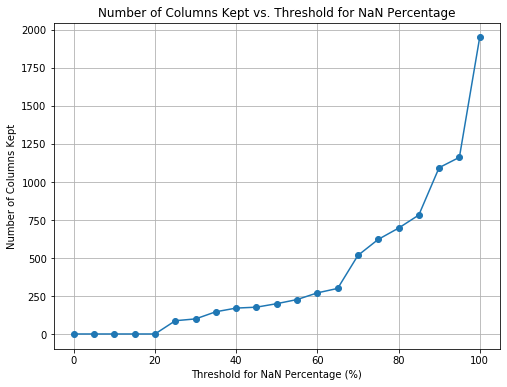

In [6]:
# let's drop columns where the number of NaN's is greater than a given threshold % 
# First determine what that threshold should be

# Range of thresholds to test
thresholds = range(0, 101, 5)  # Vary from 0% to 100% in increments of 5%

# Calculate the percentage of NaNs per column
nan_percentage = (merged_df.isna().mean() * 100).round(2)


# Initialize lists to store results
threshold_values = []
kept_columns = []


# Calculate the number of columns kept for each threshold
for threshold in thresholds:
    columns_to_drop = nan_percentage > threshold
    kept_columns_count = sum(~columns_to_drop)  # Count columns that are not dropped
    threshold_values.append(threshold)
    kept_columns.append(kept_columns_count)

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(threshold_values, kept_columns, marker='o', linestyle='-')
plt.title('Number of Columns Kept vs. Threshold for NaN Percentage')
plt.xlabel('Threshold for NaN Percentage (%)')
plt.ylabel('Number of Columns Kept')
plt.grid(True)
plt.show()



In [7]:
# These rows should be kept, these are their respective NaN percentages 
print((merged_df['SH.STA.MMRT'].isna().mean() * 100).round(2))
print((merged_df['SH.STA.MMRT.NE'].isna().mean() * 100).round(2))

73.42
65.19


In [8]:
# Define Threshold
threshold = 85

# Create a boolean mask for columns with more than the threshold percentage of NaNs
columns_to_drop = nan_percentage > threshold

# Drop the columns with more than the threshold percentage of NaNs
df_cleaned = merged_df.drop(columns=nan_percentage[columns_to_drop].index)
df_cleaned

,Country,Year,SH.ANM.ALLW.ZS,SH.ANM.CHLD.ZS,SH.ANM.NPRG.ZS,SH.DTH.IMRT,SH.DTH.IMRT.FE,SH.DTH.IMRT.MA,SH.DTH.MORT,SH.DTH.MORT.FE,...,SI.DST.50MD,SI.DST.FRST.10,SI.DST.FRST.20,SI.POV.DDAY,SI.POV.GAPS,SI.POV.GINI,SI.POV.LMIC,SI.POV.LMIC.GP,SI.POV.UMIC,SI.POV.UMIC.GP
0,AUS,1960,NaN,NaN,NaN,4571.0,1960.0,2611.0,5543.0,2389.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,1961,NaN,NaN,NaN,4614.0,1972.0,2642.0,5573.0,2395.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,1962,NaN,NaN,NaN,4577.0,1951.0,2626.0,5524.0,2369.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AUS,1963,NaN,NaN,NaN,4442.0,1893.0,2549.0,5378.0,2308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,1964,NaN,NaN,NaN,4286.0,1825.0,2461.0,5206.0,2231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,USA,2080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3314,USA,2085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3315,USA,2090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3316,USA,2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Establish 2 DFs, 1 for each maternal mortality indicator
# drop all rows that do not have a value within that indicator 
df_MMRT = df_cleaned.copy()
df_MMRTNE = df_cleaned.copy()

df_MMRT = df_MMRT.dropna(subset= ['SH.STA.MMRT'])
df_MMRTNE = df_MMRTNE.dropna(subset= ['SH.STA.MMRT.NE'])

In [10]:
# Impute missing values using KNNImputer

# Let's consider n a hyperparameter to explore later 
######## COME BACK TO THIS! ############

n = 3 

# Scale data for both sets
scaler = MinMaxScaler()

# Define the columns to include in scaling and imputation
columns_to_scale = df_MMRT.columns[2:]  # Exclude the first two columns
columns_to_exclude = ['SH.STA.MMRT', 'SH.STA.MMRTNE']  # Add the column(s) to exclude

# Separate the columns to scale and exclude
columns_to_scale = [col for col in columns_to_scale if col not in columns_to_exclude]

# Scale data for the columns to scale
X_MMRT = df_MMRT[columns_to_scale].copy()
X_MMRT = scaler.fit_transform(X_MMRT)

X_MMRTNE = df_MMRTNE[columns_to_scale].copy()
X_MMRTNE = scaler.fit_transform(X_MMRTNE)

# Impute missing values using KNNImputer
knn_imputer = KNNImputer(n_neighbors=n)

imputed_data_MMRT = knn_imputer.fit_transform(X_MMRT)
df_MMRT[columns_to_scale] = imputed_data_MMRT

imputed_data_MMRTNE = knn_imputer.fit_transform(X_MMRTNE)
df_MMRTNE[columns_to_scale] = imputed_data_MMRTNE


In [11]:
# drop the opposite maternal mortality indicator from each dataset 
df_MMRT = df_MMRT.drop('SH.STA.MMRT.NE', axis = 1)
df_MMRTNE = df_MMRTNE.drop('SH.STA.MMRT', axis = 1)

In [12]:
#df_MMRT

In [13]:
#df_MMRTNE

In [14]:
df_MMRT.to_csv('WorldBankDatasets/Cleaned/AllMerged_Threshold_85_n3_MMRT.csv', index=False) 

In [15]:
df_MMRTNE.to_csv('WorldBankDatasets/Cleaned/AllMerged_Threshold_85_n3_MMRTNE.csv', index=False) 

In [16]:
merged_df.to_csv('WorldBankDatasets/AllMerged.csv', index=False)